In [73]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [74]:
dqn = json.load(open(r'experiments/230215_1702_P12_dqn_rgb_array_ofp-v0_discrete_single_5000000.json'))
a2c = json.load(open(r'experiments/230216_1101_P12_a2c_rgb_array_ofp-v0_discrete_single_5000000.json'))
ppo = json.load(open(r'experiments/230215_1045_P12_ppo_rgb_array_ofp-v0_discrete_single_5000000.json'))

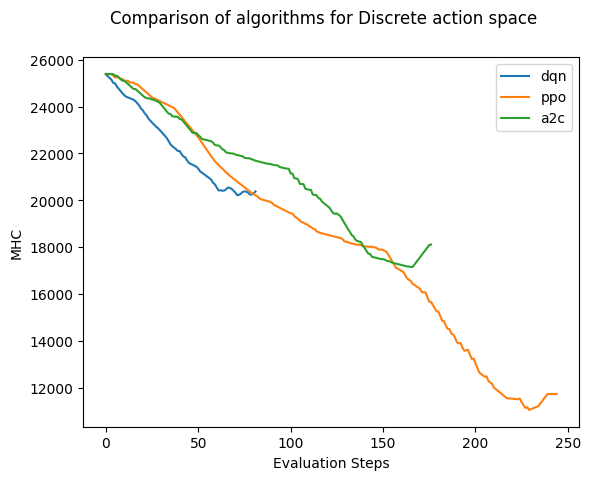

In [75]:
fig = plt.figure()
plt.plot(dqn['cost_best'], label='dqn')
plt.plot(ppo['cost_best'], label='ppo')
plt.plot(a2c['cost_best'], label='a2c')
plt.legend(loc='upper right')
plt.xlabel('Evaluation Steps')
plt.ylabel('MHC')
plt.suptitle('Comparison of algorithms for Discrete action space')
plt.show()

In [76]:
mhc=pd.DataFrame({'dqn': pd.Series(dqn['cost_best']), 'a2c': pd.Series(a2c['cost_best']), 'ppo': pd.Series(ppo['cost_best'])})
mhc

,dqn,a2c,ppo
0,25376.0,25398.0,25398.0
1,25306.0,25396.0,25396.0
2,25224.0,25394.0,25394.0
3,25154.0,25392.0,25392.0
4,25018.0,25390.0,25322.0
...,...,...,...
240,NaN,NaN,11724.0
241,NaN,NaN,11724.0
242,NaN,NaN,11724.0
243,NaN,NaN,11724.0


In [77]:
DQN=mhc['dqn']
PPO=mhc['ppo']
A2C=mhc['a2c']

m = px.line(y=[A2C, PPO, DQN],
              title="Comparison of algorithms for Discrete action space",
              labels={
                     "index": "Evaluation Steps",
                     "value": "Material Handling Cost"})


In [78]:
series_names = ['A2C', 'PPO', 'DQN']
for idx, name in enumerate(series_names):
    m.data[idx].name = name
    m.data[idx].hovertemplate = name
m.update_layout(xaxis_range=[1,200])
fig.show()

C:\Users\HHB\AppData\Local\Temp\ipykernel_13184\252397866.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



In [79]:
# Opening JSON file
f = open('experiments/run-230215_1045_P12_ppo_rgb_array_ofp-v0_discrete_single_5000000_PPO_1-tag-rollout_ep_rew_mean.json')
g = open('experiments/run-230215_1702_P12_dqn_rgb_array_ofp-v0_discrete_single_5000000_DQN_1-tag-rollout_ep_rew_mean.json')
h = open('experiments/run-230216_1101_P12_a2c_rgb_array_ofp-v0_discrete_single_5000000_A2C_1-tag-rollout_ep_rew_mean.json')
# returns JSON object as
# a dictionary
ppo = json.load(f)
dqn = json.load(g)
a2c = json.load(h)

index = [i[1] for i in dqn]
ppo_rew = [i[2] for i in ppo]
a2c_rew = [i[2] for i in a2c]
dqn_rew = [i[2] for i in dqn]

df = pd.DataFrame({'ppo': pd.Series(ppo_rew), 'dqn': pd.Series(dqn_rew), 'a2c': pd.Series(a2c_rew), 'i': pd.Series(index)})

In [80]:
df_1 = pd.DataFrame(ppo, columns=['timestamp', 'trainstep', 'reward'])
df_2 = pd.DataFrame(dqn, columns=['timestamp', 'trainstep', 'reward'])
df_3 = pd.DataFrame(a2c, columns=['timestamp', 'trainstep', 'reward'])

In [90]:
rewards = go.Figure()
rewards.add_trace(go.Scatter(x=df_1['trainstep'], y=df_1['reward'], mode="lines", name='PPO'))
rewards.add_trace(go.Scatter(x=df_2['trainstep'], y=df_2['reward'], mode="lines", name='DQN'))
rewards.add_trace(go.Scatter(x=df_3['trainstep'], y=df_3['reward'], mode="lines", name='A2C'))
rewards.update_xaxes(title_text='Training Steps',
                     tickfont_family='Times New Roman',
                     title_font_family ='Times New Roman')
rewards.update_yaxes(title_text='Mean Episode Reward',
                     tickfont_family='Times New Roman',
                     title_font_family ='Times New Roman')
rewards.update_layout(xaxis_range=[0, 5100000], title='Training Results: Rewards Overview for different algorithms used',
                      template='plotly_white',
legend_font_family = 'Times New Roman',
                      title_font_family = 'Times New Roman')
rewards.show()
rewards.write_image("reward.png")

In [89]:
mhc_img = go.Figure()
mhc_img.add_trace(go.Scatter(x=mhc.index, y=mhc['ppo'], mode="lines", name='PPO'))
mhc_img.add_trace(go.Scatter(x=mhc.index, y=mhc['dqn'], mode="lines", name='DQN'))
mhc_img.add_trace(go.Scatter(x=mhc.index, y=mhc['a2c'], mode="lines", name='A2C'))
mhc_img.update_xaxes(title_text='Evaluation Steps',
                     tickfont_family='Times New Roman',
                     title_font_family ='Times New Roman')
mhc_img.update_yaxes(title_text='Material Handling Cost (MHC)',
                     tickfont_family='Times New Roman',
                     title_font_family ='Times New Roman')
mhc_img.update_layout(template='plotly_white',
                      title='Evaluation Results: MHC progress for the algorithms examined',
                      legend_font_family = 'Times New Roman',
                      title_font_family = 'Times New Roman')
mhc_img.show()
mhc_img.write_image("mhc.png")

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=4,
    specs=[
           [{"colspan": 2}, {}, {"colspan": 2}, {}],
    [{}, {}, {}, {}]],
    subplot_titles=("Mean Episode Reward (Training)","","Material Handling Cost (Evaluation)","", "Initial Layout", "PPO Result", "DQN Result", "A2C Result"),
    vertical_spacing = 0.35
)

marker = dict(color=[1, 2, 3], coloraxis="coloraxis")
fig.add_trace(go.Scatter(x=df_1['trainstep'], y=df_1['reward'], mode="lines", name='PPO', line_color='deepskyblue'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2['trainstep'], y=df_2['reward'], mode="lines", name='DQN', line_color='red'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_3['trainstep'], y=df_3['reward'], mode="lines", name='A2C', line_color='orange'), row=1, col=1)



fig.add_trace(go.Scatter(x=mhc.index, y=mhc['dqn'], mode="lines", name='DQN', line_color='red', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=mhc.index, y=mhc['ppo'], mode="lines", name='PPO', line_color='deepskyblue', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=mhc.index, y=mhc['a2c'], mode="lines", name='A2C', line_color='orange', showlegend=False), row=1, col=3)

from PIL import Image
src4 = Image.open('experiments/{save_path}_2.png')
src = Image.open('experiments/ppo_0.png')
src3 = Image.open('experiments/230215_1702_P12_dqn_rgb_array_ofp-v0_discrete_single_5000000_2.png')
src2 = Image.open('experiments/ppo_2.png')

fig.add_trace(px.imshow(src).data[0], col=1, row=2)
fig.add_trace(px.imshow(src2).data[0], col=2, row=2)
fig.add_trace(px.imshow(src3).data[0], col=3, row=2)
fig.add_trace(px.imshow(src4).data[0], col=4, row=2)

fig.update_layout(showlegend=True,
                  title_text="Specs with Subplot Title",
                  xaxis=dict(title_text='Training Steps'),
                  xaxis3=dict(title_text='Evaluation Steps'),
                  yaxis=dict(title_text='Reward'),
                  yaxis3=dict(title_text='MHC'),
                  legend=dict(yanchor="top", y=0.5, xanchor="left", x=0.0, orientation="h"))
fig.show()

In [ ]:
fig.write_image("fig1.png")

In [ ]:
fig.update_layout(xaxis=dict(title_text='x'), xaxis2=dict(title_text='active users'))